 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_path = Path("whale_returns.csv")
Whale_dataframe = pd.read_csv(whale_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
Whale_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
Whale_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
dropnull_Whale = Whale_dataframe.dropna()
dropnull_Whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_path = Path("algo_returns.csv")
algo_dataframe = pd.read_csv(algo_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_dataframe.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
dropnull_algo = algo_dataframe.dropna()
dropnull_algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sptsx_path = Path("sp_tsx_history.csv")
sptsx_dataframe = pd.read_csv(sptsx_path, index_col="Date", infer_datetime_format=True, parse_dates=True)
sptsx_dataframe = sptsx_dataframe.sort_index()
sptsx_dataframe.head

<bound method NDFrame.head of                  Close
Date                  
2012-10-01  $12,370.19
2012-10-02  $12,391.23
2012-10-03  $12,359.47
2012-10-04  $12,447.68
2012-10-05  $12,418.99
...                ...
2019-12-20  $17,118.44
2019-12-23  $17,128.71
2019-12-24  $17,180.15
2019-12-27  $17,168.21
2019-12-30  $17,098.56

[1818 rows x 1 columns]>

In [9]:
# Check Data Types
sptsx_dataframe.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sptsx_dataframe['Close']= sptsx_dataframe['Close'].str.replace('$','')
sptsx_dataframe["Close"]= sptsx_dataframe["Close"].str.replace(",","") 
sptsx_dataframe["Close"]= sptsx_dataframe["Close"].astype("float")  

<ipython-input-10-29f2e11faa60>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sptsx_dataframe['Close']= sptsx_dataframe['Close'].str.replace('$','')


In [11]:
# Calculate Daily Returns
daily_return_sptsx = sptsx_dataframe.pct_change()
daily_return_sptsx.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [12]:
# Drop nulls
dropnull_xptsp = daily_return_sptsx.dropna()  
dropnull_xptsp.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [13]:
# Rename `Close` Column to be specific to this portfolio.
cleansed_xptsp=dropnull_xptsp.rename(columns={'Close': 'S&P TSX'})
cleansed_xptsp.shape

(1817, 1)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

joined_data = pd.concat(
    [dropnull_Whale, dropnull_algo,cleansed_xptsp], axis="columns", join="outer"
)
joined_data= joined_data.dropna()
joined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [15]:
joined_data.shape

(1029, 7)

---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

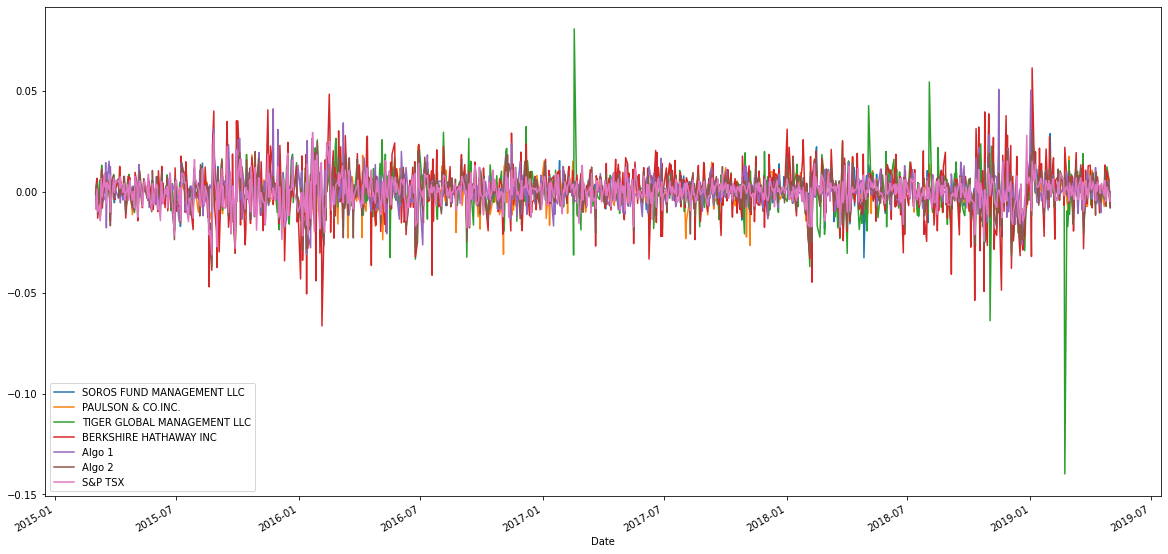

In [16]:
# Plot daily returns of all portfolios

joined_data.plot(figsize=(20,10))

# combined_chart=dropnull_Whale.plot(figsize=(10,5))
# dropnull_algo.plot(figsize=(10,5),ax=combined_chart)
# daily_return_sptsx.plot(figsize=(10,5),ax=combined_chart)

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

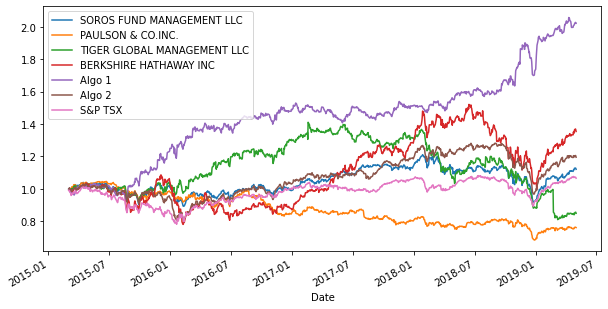

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns=(1+joined_data).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(10,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

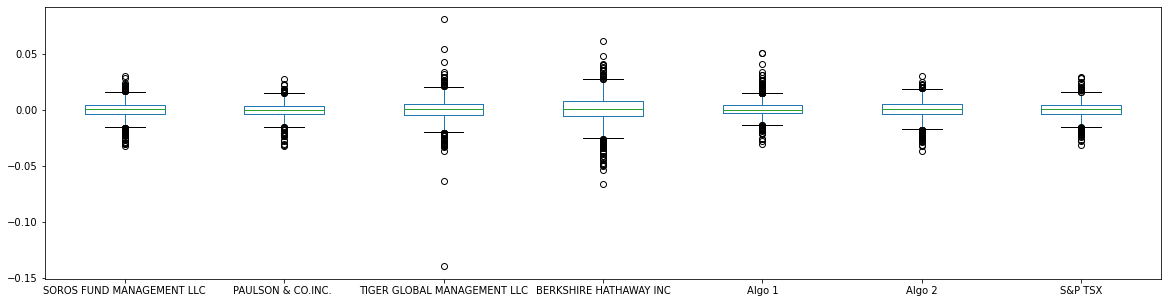

In [18]:
# Box plot to visually show risk
joined_data.plot.box(figsize=(20,5))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
joined_data_std= joined_data.std()
joined_data_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX                        0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [20]:
# Calculate the daily standard deviation of S&P TSX 60
Std_xptsp= joined_data_std['S&P TSX'] 
print(Std_xptsp)

0.007034167748577725


In [21]:
# Determine which portfolios are riskier than the S&P TSX 60
joined_data_std > Std_xptsp 

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX                        False
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = joined_data_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX                        0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

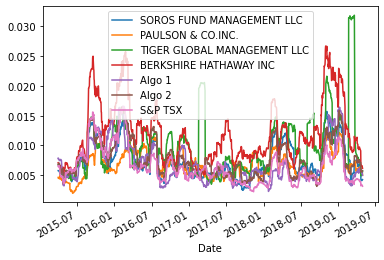

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
joined_data_21days=joined_data.rolling(window=21).std().plot()
joined_data_21days

### Calculate and plot the correlation

<AxesSubplot:>

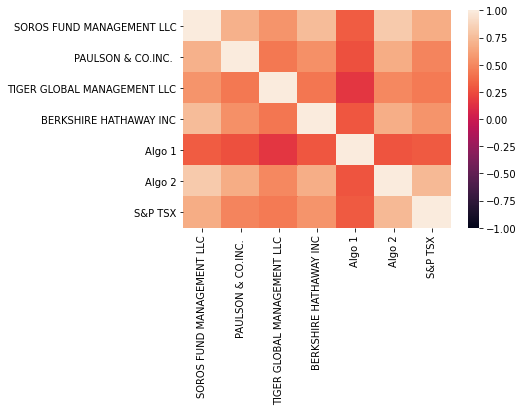

In [24]:
# Calculate the correlation
import seaborn
correlation = joined_data.corr(method='pearson', min_periods=1)
correlation

# Display de correlation matrix 
seaborn.heatmap(correlation,vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

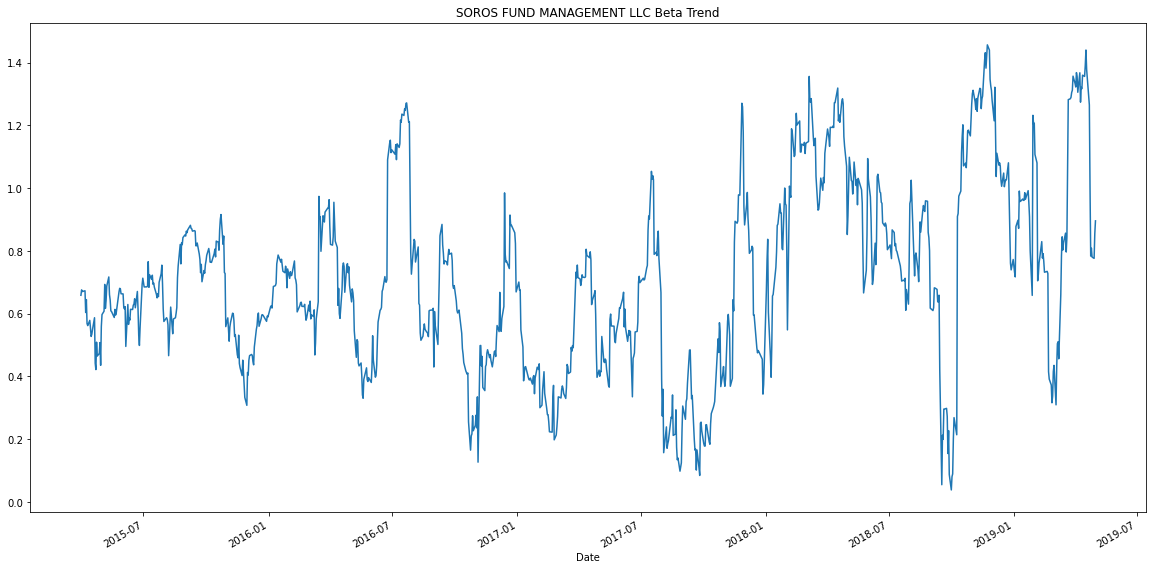

In [25]:
# Calculate covariance of a single portfolio
covariance =joined_data["SOROS FUND MANAGEMENT LLC"].rolling(window=21).cov(joined_data['S&P TSX'])

# Calculate variance of S&P TSX
variance =joined_data['S&P TSX'].rolling(window=21).var()

# Computing beta
beta_SOROS = covariance / variance

# Plot beta trend
plot_beta_SOROS = beta_SOROS.plot(figsize=(20, 10), title="SOROS FUND MANAGEMENT LLC Beta Trend")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

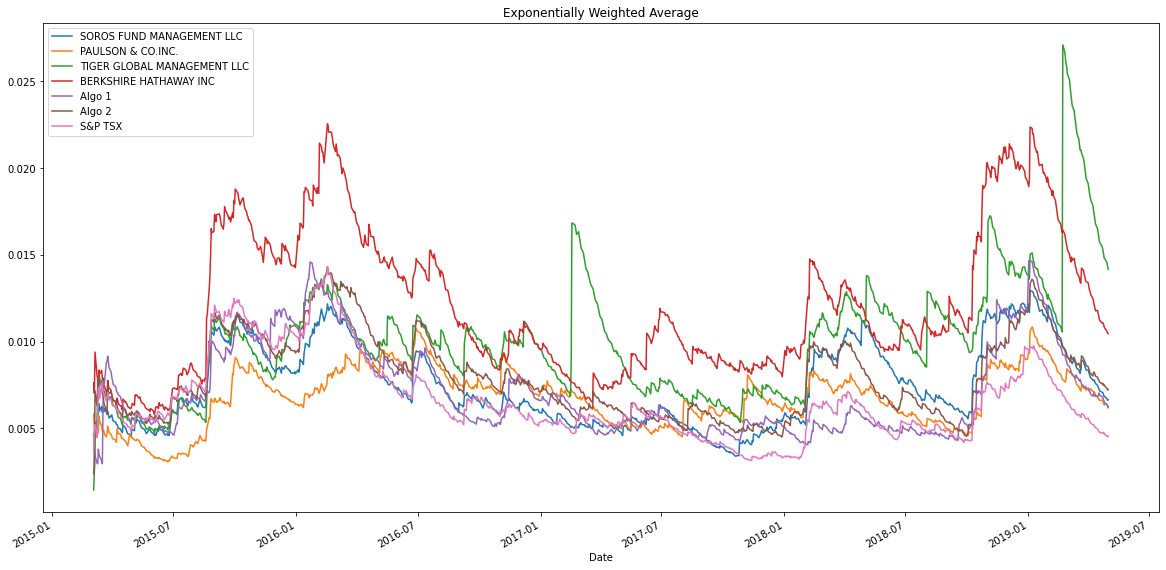

In [26]:
# Use `ewm` to calculate the rolling window
joined_data.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (joined_data.mean()*252)/ (joined_data.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

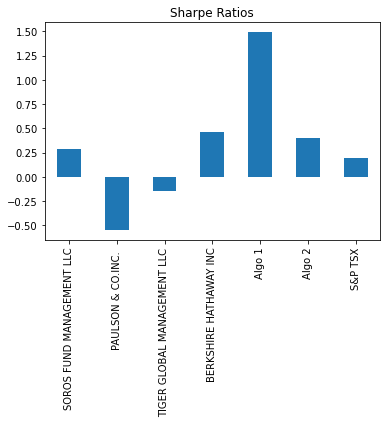

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 has a sharp ratio higher than both S&P TSX 60 and Whale portfolios. Algo 1 has a better risk-adjusted performance when compared to the rest of the portfolios. 
Algo 1 is the most attractive investment choice among all portfolios with it highest sharp ratio, it might be the most diversified portfolio thus less risky and higher return. 
Algo 2 has a sharp ratio higher than most Whale investor portfolios except from Berkshire Hathaway Inc, it has risk-adjusted performance when compared to them, but a less attractive investment choice when compared to Berkshire Hathaway Inc. 

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [29]:
# Reading data from 1st stock
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

shop_df = yf.download('SHOP', 
                      start='2013-01-01', 
                      end='2019-12-31', 
                      progress=False)

shop_df = shop_df.sort_values("Close", ascending=False)
Shop_Close = shop_df .iloc[:,3]
Shop_Close .head()

Date
2019-12-26    408.750000
2019-12-27    408.000000
2019-08-27    406.989990
2019-12-24    399.390015
2019-12-18    396.940002
Name: Close, dtype: float64

In [30]:
# Reading data from 2nd stock
otex_df = yf.download('otex', 
                      start='2013-01-01', 
                      end='2019-12-31', 
                      progress=False)
otex_df = otex_df.sort_values("Close", ascending=False)
otex_Close = otex_df .iloc[:,3]
otex_Close.head()

Date
2019-12-20    44.590000
2019-11-26    44.400002
2019-12-27    44.060001
2019-12-26    44.060001
2019-07-26    44.060001
Name: Close, dtype: float64

In [31]:
# Reading data from 3rd stock
l_df = yf.download('L.TO', 
                      start='2013-01-01', 
                      end='2019-12-31', 
                      progress=False)
l_df = l_df.sort_values("Close", ascending=False)
l_Close = l_df .iloc[:,3]
l_Close.head()

Date
2019-09-24    75.769997
2019-09-25    75.680000
2019-09-30    75.459999
2019-10-03    75.199997
2019-10-07    75.110001
Name: Close, dtype: float64

In [32]:
# Combine all stocks in a single DataFrame
combined_data = pd.concat(
    [Shop_Close,otex_Close,l_Close], axis="columns", join="inner"
)
combined_data= combined_data.dropna()
combined_data.head()

,Close,Close,Close
Date,,,
2019-12-27,408.000000,44.060001,67.779999
2019-08-27,406.989990,38.610001,71.610001
2019-12-24,399.390015,43.689999,67.669998
2019-12-18,396.940002,43.849998,68.779999
2019-08-26,395.959991,38.490002,71.220001


In [33]:
# Reset Date index
#reset_data=combined_data.set_index('Date', inplace=True)
#reset_data.head()

# Set column names
combined_data.columns=['Shopify','Open Text Corporation','Loblaw Companies Limited']
combined_data

,Shopify,Open Text Corporation,Loblaw Companies Limited
Date,,,
2019-12-27,408.000000,44.060001,67.779999
2019-08-27,406.989990,38.610001,71.610001
2019-12-24,399.390015,43.689999,67.669998
2019-12-18,396.940002,43.849998,68.779999
2019-08-26,395.959991,38.490002,71.220001
...,...,...,...
2016-01-15,19.889999,22.860001,52.451767
2016-02-09,19.850000,21.424999,51.318329
2016-02-11,19.370001,23.375000,50.908360


In [34]:
# Reorganize portfolio data by having a column per symbol
#pivot = combined_data_reset.pivot(columns='Indicator Name',values='Indicator Value')

In [35]:
# Calculate daily returns
combined_returns = combined_data.pct_change()
combined_returns.head()

# Drop NAs
Cleansed_data= combined_returns.dropna()

# Display sample data
Cleansed_data

,Shopify,Open Text Corporation,Loblaw Companies Limited
Date,,,
2019-08-27,-0.002476,-0.123695,0.056506
2019-12-24,-0.018674,0.131572,-0.055020
2019-12-18,-0.006134,0.003662,0.016403
2019-08-26,-0.002469,-0.122235,0.035475
2019-08-28,-0.002930,0.000520,0.008425
...,...,...,...
2016-01-15,-0.004006,-0.027441,0.018576
2016-02-09,-0.002011,-0.062773,-0.021609
2016-02-11,-0.024181,0.091015,-0.007989


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
shop_weight = 1/3
otex_weight = 1/3
l_weight = 1/3

portfolio_returns = shop_weight * Cleansed_data["Shopify"] + otex_weight * Cleansed_data["Open Text Corporation"]+l_weight*Cleansed_data["Loblaw Companies Limited"]
portfolio_returns.head()

# Display sample data
portfolio_returns

Date
2019-08-27   -0.023221
2019-12-24    0.019293
2019-12-18    0.004644
2019-08-26   -0.029743
2019-08-28    0.002005
                ...   
2016-01-15   -0.004290
2016-02-09   -0.028798
2016-02-11    0.019615
2016-02-12    0.010068
2015-05-20   -0.033336
Length: 1136, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [37]:
# Join your returns DataFrame to the original returns DataFrame
final_data = pd.concat(
    [joined_data,Cleansed_data], axis="columns", join="inner"
)
     
final_data= final_data.dropna()
final_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Shopify,Open Text Corporation,Loblaw Companies Limited
Date,,,,,,,,,,
2015-05-20,-0.001873,0.001274,0.000438,0.001162,-0.004340,-0.001501,-0.003187,-0.120538,0.023819,-0.003288
2015-05-21,0.002225,0.003178,0.000917,0.004597,0.006866,-0.000162,0.008677,-0.001555,-0.109129,-0.016811
2015-05-22,0.000542,0.000292,0.000734,0.005268,-0.007780,-0.003892,-0.000187,-0.000706,-0.042065,-0.044971
2015-05-26,-0.008718,0.000968,-0.007167,-0.003362,-0.004471,-0.009913,-0.008994,-0.004031,-0.291045,-0.069251
2015-05-27,0.005536,0.003383,0.005831,0.003505,0.000935,0.010525,0.003964,-0.000364,-0.148505,-0.117977


In [38]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Cleansed_data= final_data.dropna()
Cleansed_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Shopify,Open Text Corporation,Loblaw Companies Limited
Date,,,,,,,,,,
2015-05-20,-0.001873,0.001274,0.000438,0.001162,-0.004340,-0.001501,-0.003187,-0.120538,0.023819,-0.003288
2015-05-21,0.002225,0.003178,0.000917,0.004597,0.006866,-0.000162,0.008677,-0.001555,-0.109129,-0.016811
2015-05-22,0.000542,0.000292,0.000734,0.005268,-0.007780,-0.003892,-0.000187,-0.000706,-0.042065,-0.044971
2015-05-26,-0.008718,0.000968,-0.007167,-0.003362,-0.004471,-0.009913,-0.008994,-0.004031,-0.291045,-0.069251
2015-05-27,0.005536,0.003383,0.005831,0.003505,0.000935,0.010525,0.003964,-0.000364,-0.148505,-0.117977


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [39]:
# Calculate the annualized `std`
Annualized_std_final = Cleansed_data * np.sqrt(252)
Cleansed_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX,Shopify,Open Text Corporation,Loblaw Companies Limited
Date,,,,,,,,,,
2015-05-20,-0.001873,0.001274,0.000438,0.001162,-0.004340,-0.001501,-0.003187,-0.120538,0.023819,-0.003288
2015-05-21,0.002225,0.003178,0.000917,0.004597,0.006866,-0.000162,0.008677,-0.001555,-0.109129,-0.016811
2015-05-22,0.000542,0.000292,0.000734,0.005268,-0.007780,-0.003892,-0.000187,-0.000706,-0.042065,-0.044971
2015-05-26,-0.008718,0.000968,-0.007167,-0.003362,-0.004471,-0.009913,-0.008994,-0.004031,-0.291045,-0.069251
2015-05-27,0.005536,0.003383,0.005831,0.003505,0.000935,0.010525,0.003964,-0.000364,-0.148505,-0.117977


### Calculate and plot rolling `std` with 21-day window

In [59]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
final_std_21days=Cleansed_data.rolling(window=21).std()
final_std_21days(figsize=(20, 10), title='Rolling 21-Day Covariance')

TypeError: 'DataFrame' object is not callable

### Calculate and plot the correlation

<AxesSubplot:>

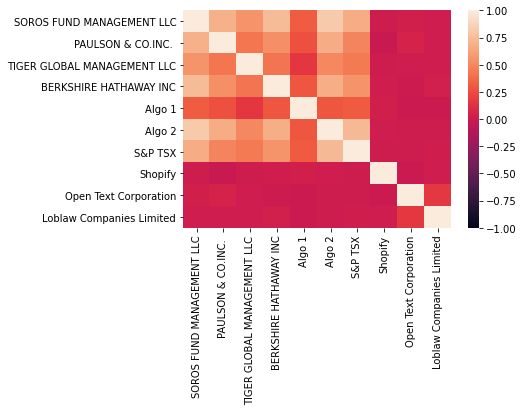

In [54]:
# Calculate and plot the correlation
import seaborn
correlation_final =Cleansed_data.corr()
correlation_final

# Display de correlation matrix 
seaborn.heatmap(correlation_final,vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [51]:
# Calculate and plot Beta
covariance_final_Shop =Cleansed_data["Shopify"].rolling(window=60).cov(Cleansed_data['S&P TSX'])
covariance_final_otex =Cleansed_data["Open Text Corporation"].rolling(window=60).cov(Cleansed_data['S&P TSX'])
covariance_final_l =Cleansed_data["Loblaw Companies Limited"].rolling(window=60).cov(Cleansed_data['S&P TSX'])

# Calculate variance of S&P TSX
variance_final =Cleansed_data['S&P TSX'].rolling(window=60).var()

# Computing beta
beta_final_shop= covariance_final_Shop /variance_final
beta_final_otex= ovariance_final_otex /variance_final
beta_final_l= covariance_final_l /variance_final

# Plot beta trend
plot_beta_final = beta_final_shop.plot(figsize=(20, 10), title="60-day Rolling Beta for portfolio Shopify, Open Text Corporation and Loblaw Companies Limited compared to the S&P 60 TSX ")

NameError: name 'ovariance_final_otex' is not defined

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Calculate Annualzied Sharpe Ratios

sharpe_ratios_final = (Cleansed_data.mean()*252)/ (Cleansed_data.std() * np.sqrt(252))
sharpe_ratios_final

SOROS FUND MANAGEMENT LLC      0.229196
PAULSON & CO.INC.             -0.645959
TIGER GLOBAL MANAGEMENT LLC   -0.182472
BERKSHIRE HATHAWAY INC         0.461466
Algo 1                         1.490434
Algo 2                         0.380764
S&P TSX                        0.223989
Shopify                       -7.173147
Open Text Corporation          0.776635
Loblaw Companies Limited       0.392270
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

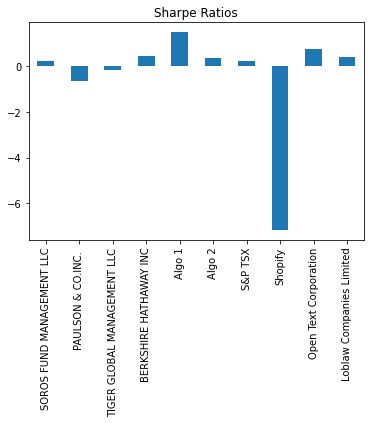

In [53]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios_final.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!